# Random Forest

## Regression

In [97]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=6):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        N = X.shape[0]
        
        # Bagging iterations
        for _ in range(self.n_estimators):
            # D Tree with random subset of features at each split 
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=1.0, splitter="best")

            indices = np.random.choice(N, size=N, replace=True)
            tree.fit(X[indices], y[indices])

            self.trees.append(tree)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return preds.mean(axis=0)

    def __call__(self, X):
        return self.predict(X)

In [98]:
from helpers.GetDatasets import regression_split
X_train, X_test, y_train, y_test = regression_split()

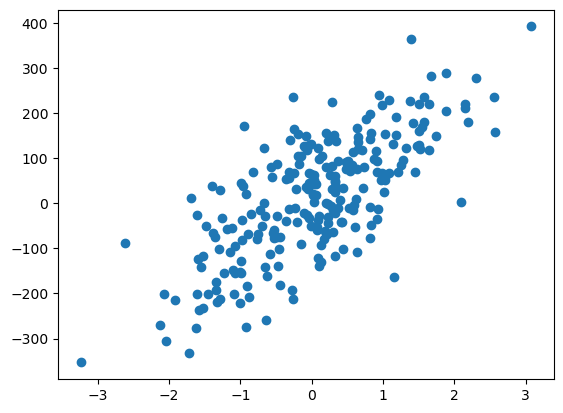

In [99]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train)

In [105]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model(X_test)

In [106]:
from helpers.MathFunctions import r_squared
r_squared(preds, y_test)

0.8165543431614918

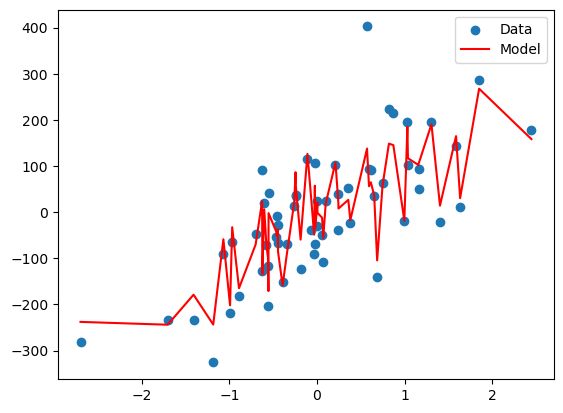

In [107]:
plt.scatter(X_test[:, 0], y_test, label="Data")

idx = np.argsort(X_test[:, 0])
X_sorted = X_test[idx, 0]
y_pred = model.predict(X_test[idx])

plt.plot(X_sorted, y_pred, label="Model", c='r')
plt.legend()
plt.show()

In [108]:
preds = model(X_train)
r_squared(preds, y_train)

0.9658042416956962

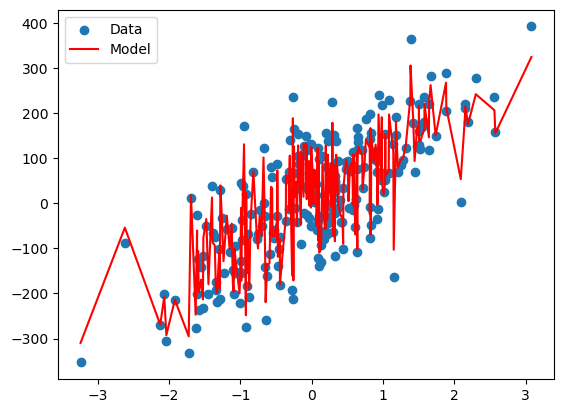

In [109]:
plt.scatter(X_train[:, 0], y_train, label="Data")

idx = np.argsort(X_train[:, 0])
X_sorted = X_train[idx, 0]
y_pred = model.predict(X_train[idx])

plt.plot(X_sorted, y_pred, label="Model", c='r')
plt.legend()
plt.show()

## Classification

In [110]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=6, max_features="sqrt"):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        N = X.shape[0]

        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.max_features,
                splitter="best"
            )

            indices = np.random.choice(N, size=N, replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])

        # majority vote per sample
        y_pred = []
        for i in range(preds.shape[1]):
            y_pred.append(Counter(preds[:, i]).most_common(1)[0][0])

        return np.array(y_pred)

    def predict_proba(self, X):
        # Average class probabilities
        probas = np.array([tree.predict_proba(X) for tree in self.trees])
        return probas.mean(axis=0)

    def __call__(self, X):
        return self.predict(X)


In [111]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split()

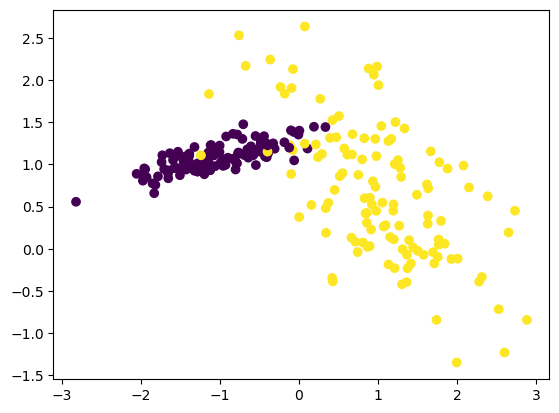

In [112]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [113]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model(X_test)

In [114]:
from helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.9333333333333333,
 'precision': 0.9090909090909091,
 'recall': 0.967741935483871}

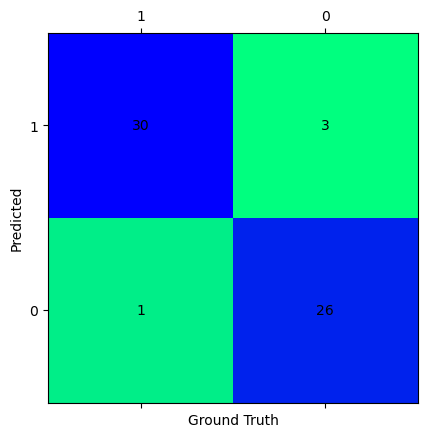

In [115]:
from helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)

In [116]:
preds = model(X_train)
cm_args, metrics = classification_stats(preds, y_train)
metrics

{'acc': 0.9958333333333333, 'precision': 1.0, 'recall': 0.9916666666666667}

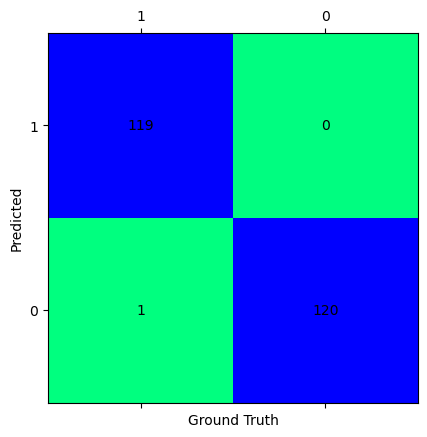

In [117]:
from helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)